In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

from sklearn import preprocessing

# so values can be viewed as scrollable element
np.set_printoptions(threshold=sys.maxsize)


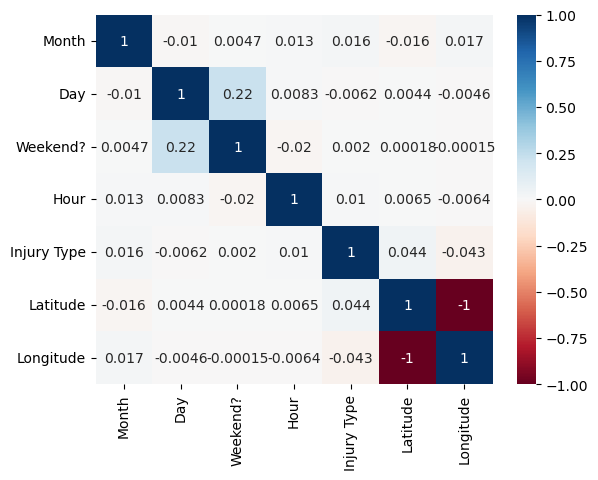

In [2]:
data_filepath = ".\\modified_data\\cleaned_data.csv"
df = pd.read_csv(data_filepath)
  
data = df.copy().drop(columns=['Reported_Location'])
correlation_matrix = data.corr()
pcmp = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

Based off the heatmap, it seems that there're are no strong linear relationships between any of the given variables and the injury types.

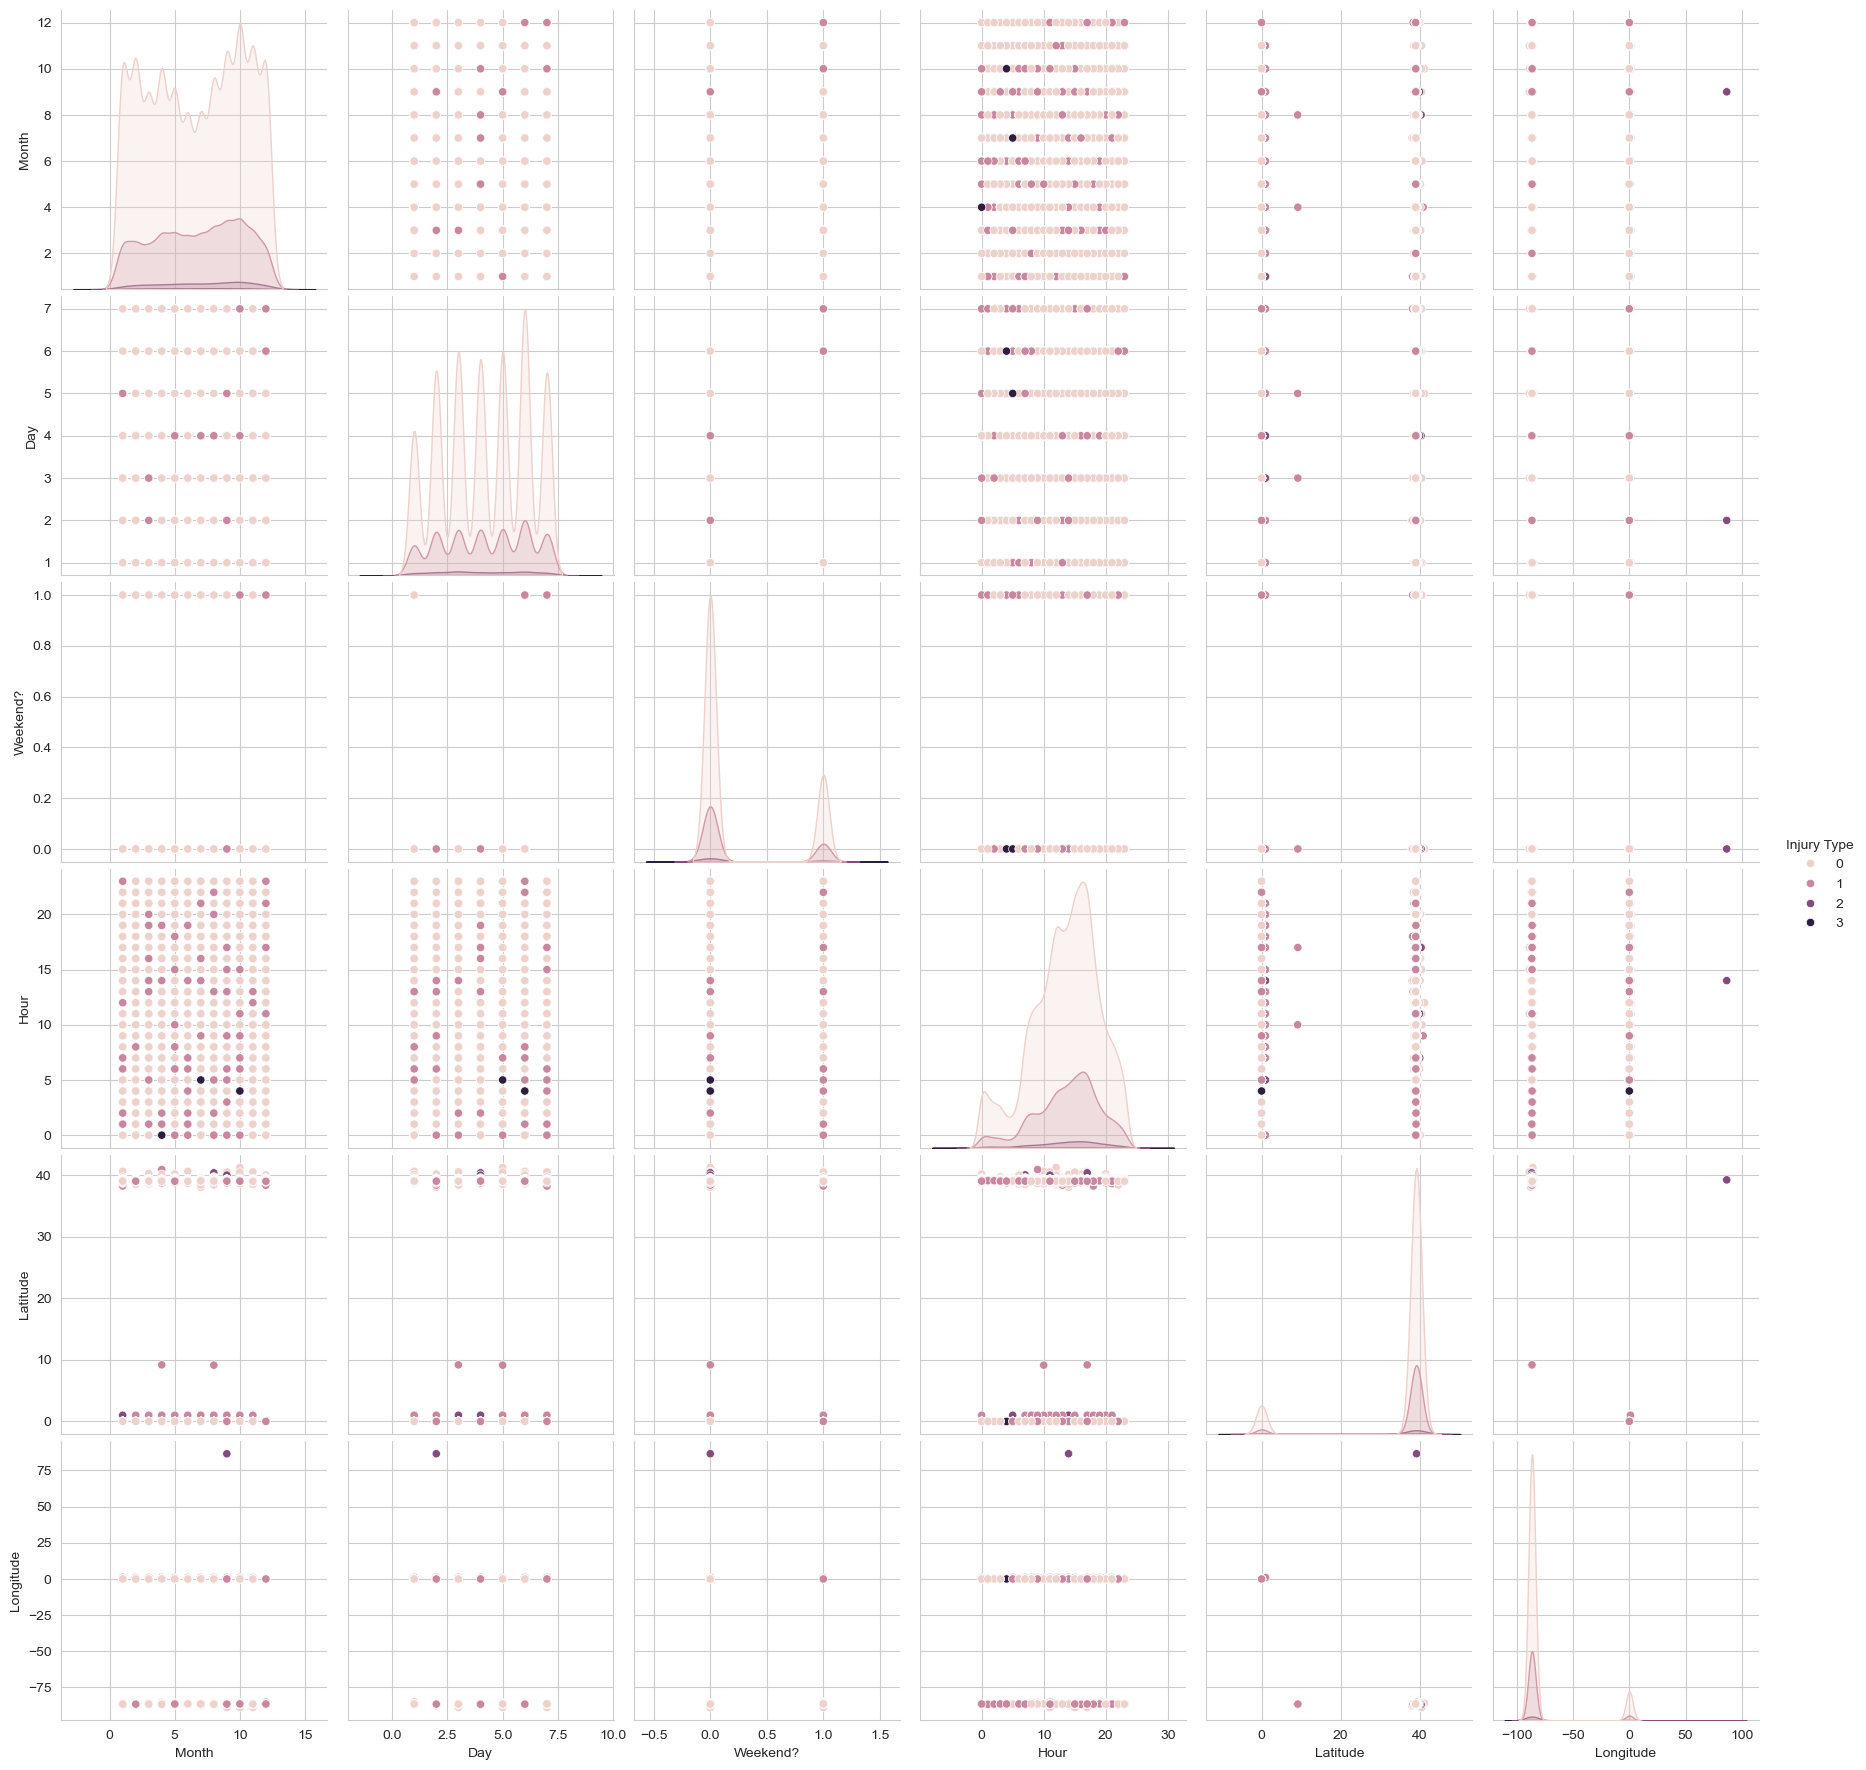

In [3]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Injury Type", height=3);
plt.show()

From the scatterplot matrices for injury type, there's no clear separation when graphing any of the variables vs injury type. We won't be able to use a simple function to classify (e.g. can't use a polynomial function to separate between injury and no-injury).

In [4]:
print(data["Injury Type"].value_counts())

Injury Type
0    41356
1    11109
2     1080
3      115
Name: count, dtype: int64


**Seeing Distribution of Injury Type**

It's evident that we have a lot more "No-injury" accidents (value = 0) than all three other types combined. If we end up using a decision tree, this could be problematic since decision trees are sensitive to more data points of a certain kind. To remedy this, if we end up using a decision tree we will have to oversample to try evening it out a bit. Considering how much we will have to oversample each injury type (e.g. 3 will have to go from 115 to 41356), it will make sense to combine 1-3 before oversampling to prevent a bunch of copies of the same data.

# Conclusions

It's evident that our data is too complicated to be modeled by a simple classifier such as linear or logistic. We can attempt to use simpler classifiers (naive bayes and decision trees) and check performance. If those do not perform well, we can attempt to increase complexity using more complicated models (neural networks, random forest). These more complex models are more prone to overfitting so we'll need to be sure we use a strategy such as k-fold validation to ensure good generalization.